In [1]:
# Part of the IR2Vec Project, under the Apache License v2.0 with LLVM
# Exceptions. See the LICENSE file for license information.
# SPDX-License-Identifier: Apache-2.0 WITH LLVM-exception
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
timeTaken = pd.read_csv("./TimeTaken_Algos.csv")
timeTakenfilename = timeTaken["Benchmarks"]
fa_data = timeTaken["FA"]
sym_data = timeTaken["SYM"]

/home/venkat/anaconda3/envs/IR2Vec/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


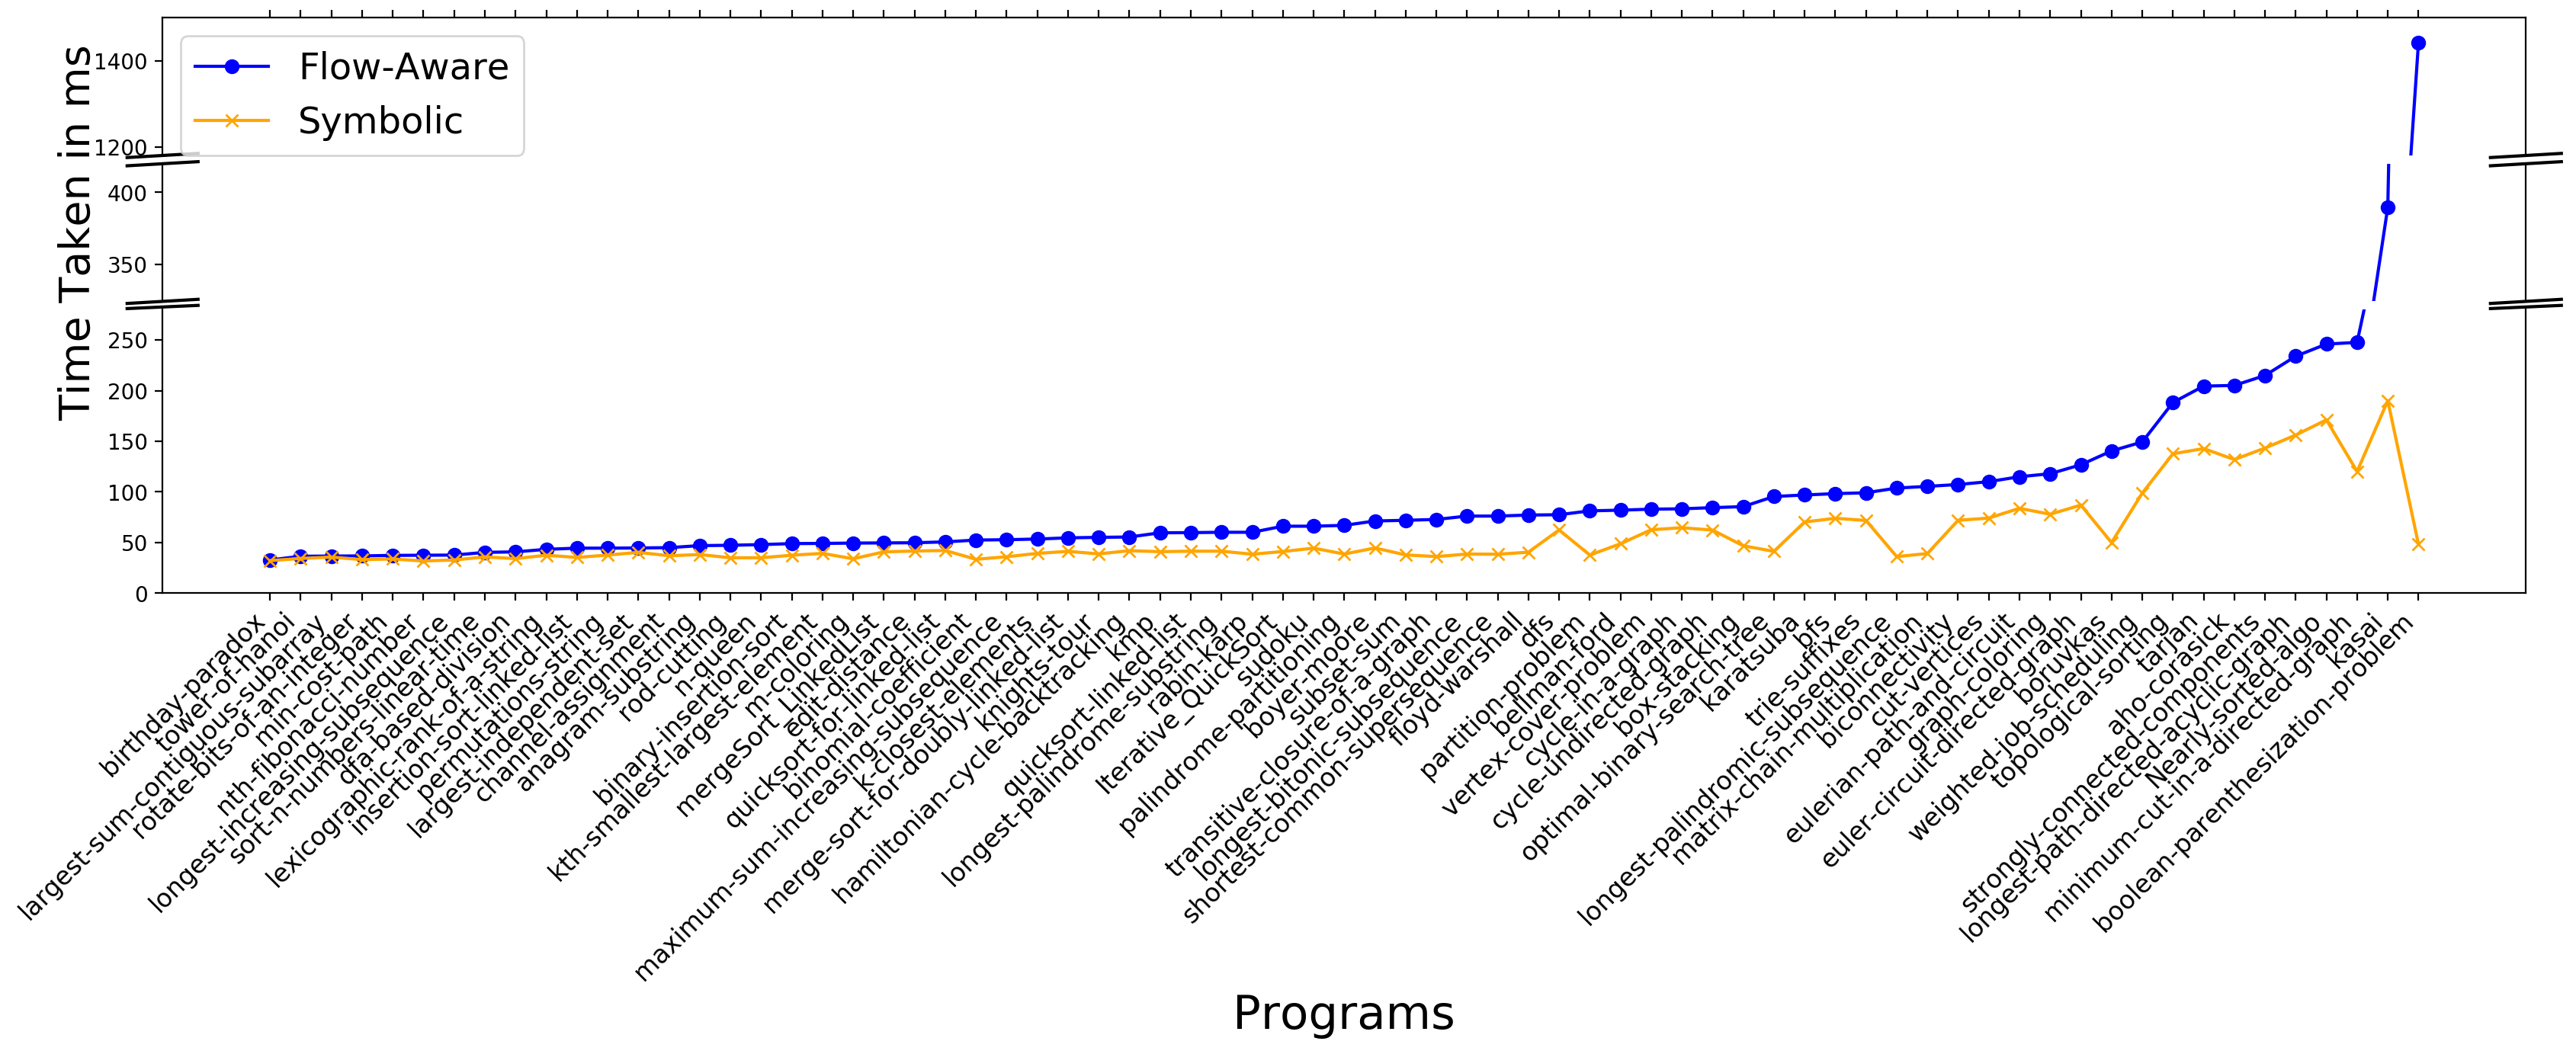

In [3]:
plt.figure(figsize=(20, 5), dpi=200)
grid = plt.GridSpec(4, 1, hspace=0.06)
ax = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[1, 0])
ax3 = plt.subplot(grid[2:4, 0])

ax.plot(timeTakenfilename, fa_data, color="blue", label="Flow-Aware", marker="o")
ax.plot(timeTakenfilename, sym_data, color="orange", label="Symbolic", marker="x")

ax2.plot(timeTakenfilename, fa_data, color="blue", label="Flow-Aware", marker="o")
ax2.plot(timeTakenfilename, sym_data, color="orange", label="Symbolic", marker="x")

ax3.plot(timeTakenfilename, fa_data, color="blue", label="Flow-Aware", marker="o")
ax3.plot(timeTakenfilename, sym_data, color="orange", label="Symbolic", marker="x")

ax.set_ylim(1180, 1500)
ax2.set_ylim(324, 420)
ax3.set_ylim(0, 280)

# hide the spines between ax and ax2
ax.spines["bottom"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop="off")  # don't put tick labels at the top
ax2.xaxis.set_visible(False)
ax3.xaxis.tick_bottom()
# ax3.yaxis.set_major_locator(x_locator)


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs = dict(transform=ax2.transAxes, color="k", clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), ((1 + d / 4), 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 + d / 4, 1 + d), **kwargs)


# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
ax3.set_xticklabels(
    timeTakenfilename, rotation=45, horizontalalignment="right", fontsize=12
)
ax.legend(fontsize="xx-large", loc=2)
ax3.set_xlabel("Programs", fontsize=22)
ax2.set_ylabel("Time Taken in ms", fontsize=20)
# plt.show()
plt.savefig("Time-Taken.pdf", bbox_inches="tight")